<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Agrupamiento_Escolaridad_SEXO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np
import pylab as pl
from pandas.plotting import scatter_matrix 
from matplotlib import cm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings

from google.colab import files 
import io

## VAMOS A LEER Y CARGAR LOS SIGUIENTES ARCHIVOS:

1. INEGI_EDO_ESCUELA.xls --> Tiene el nivel de escolaridad por estado y por sexo

2. INEGI_exporta_12_4_2023_8_47_22.xls --> Homicidios por sexo y por estado

In [3]:
upload = files.upload()

Saving INEGI_EDO_ESCUELA.xls to INEGI_EDO_ESCUELA.xls


In [4]:
df_Escuela=pd.read_excel(io.BytesIO(upload["INEGI_EDO_ESCUELA.xls"]), header=0)#df con los datos de la población
df_Escuela

,AÑO,EDO,ESCOLARIDAD,TOTAL,HOMBRES,MUJERES
0,2000,Total,Total,10737,9442.0,1284.0
1,2000,Total,Sin escolaridad,1290,1118.0,170.0
2,2000,Total,Primaria incompleta,2034,1825.0,209.0
3,2000,Total,Primaria completa,2598,2345.0,253.0
4,2000,Total,Secundaria o equivalente,1986,1772.0,214.0
...,...,...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,587,536.0,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,132,120.0,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,143,129.0,14.0
6202,2021,Zacatecas,Profesional,89,80.0,9.0


In [5]:
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

In [ ]:
df_Escuela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AÑO          6204 non-null   int64  
 1   EDO          6204 non-null   object 
 2   ESCOLARIDAD  6204 non-null   object 
 3   TOTAL        6204 non-null   int64  
 4   HOMBRES      6171 non-null   float64
 5   MUJERES      5446 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 290.9+ KB


In [6]:
df_Escuela.isna().sum()

AÑO              0
EDO              0
ESCOLARIDAD      0
TOTAL            0
HOMBRES         33
MUJERES        758
dtype: int64

In [7]:
df_Escuela.fillna(0, inplace=True)

In [8]:
df_Escuela.isna().sum()

AÑO            0
EDO            0
ESCOLARIDAD    0
TOTAL          0
HOMBRES        0
MUJERES        0
dtype: int64

##Creando df que voy a usar para los agrupamientos

In [9]:
df_E_M=df_Escuela.copy()
df_E_M=df_E_M.drop(columns=['TOTAL',	'HOMBRES'])
df_E_M

,AÑO,EDO,ESCOLARIDAD,MUJERES
0,2000,Total,Total,1284.0
1,2000,Total,Sin escolaridad,170.0
2,2000,Total,Primaria incompleta,209.0
3,2000,Total,Primaria completa,253.0
4,2000,Total,Secundaria o equivalente,214.0
...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,14.0
6202,2021,Zacatecas,Profesional,9.0


In [10]:
df_E_M['EDO'].unique()

array(['Total', 'Aguascalientes', 'Baja California',
       'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [11]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask = (df_E_M['EDO'] == 'Total') | (df_E_M['ESCOLARIDAD'] == 'Total')

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df_E_M = df_E_M.drop(df_E_M[mask].index)
df_E_M

,AÑO,EDO,ESCOLARIDAD,MUJERES
8,2000,Aguascalientes,Primaria incompleta,1.0
9,2000,Aguascalientes,Primaria completa,2.0
10,2000,Aguascalientes,Secundaria o equivalente,0.0
11,2000,Aguascalientes,Bachillerato o preparatoria completo,1.0
12,2000,Aguascalientes,Profesional,0.0
...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,51.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,12.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,14.0
6202,2021,Zacatecas,Profesional,9.0


In [12]:
# Creamos un diccionario con los estados y sus respectivos valores numéricos
dict_edo = {'Aguascalientes': 1, 'Baja California': 2, 'Baja California Sur': 3,
            'Campeche': 4, 'Coahuila de Zaragoza': 5, 'Colima': 6, 'Chiapas': 7, 'Chihuahua': 8,
            'Ciudad de México': 9, 'Durango': 10, 'Guanajuato': 11, 'Guerrero': 12, 'Hidalgo': 13,
            'Jalisco': 14, 'México': 15, 'Michoacán de Ocampo': 16, 'Morelos': 17, 'Nayarit': 18,
            'Nuevo León': 19, 'Oaxaca': 20, 'Puebla': 21, 'Querétaro': 22, 'Quintana Roo': 23,
            'San Luis Potosí': 24, 'Sinaloa': 25, 'Sonora': 26, 'Tabasco': 27, 'Tamaulipas': 28,
            'Tlaxcala': 29, 'Veracruz de Ignacio de la Llave': 30, 'Yucatán': 31, 'Zacatecas': 32,}

# Aplicamos el método replace() para cambiar los estados por valores numéricos
df_E_M['EDO'] = df_E_M['EDO'].replace(dict_edo)
df_E_M

,AÑO,EDO,ESCOLARIDAD,MUJERES
8,2000,1,Primaria incompleta,1.0
9,2000,1,Primaria completa,2.0
10,2000,1,Secundaria o equivalente,0.0
11,2000,1,Bachillerato o preparatoria completo,1.0
12,2000,1,Profesional,0.0
...,...,...,...,...
6199,2021,32,Secundaria o equivalente,51.0
6200,2021,32,Bachillerato o preparatoria incompleto,12.0
6201,2021,32,Bachillerato o preparatoria completo,14.0
6202,2021,32,Profesional,9.0


In [13]:
df_E_M['ESCOLARIDAD'].unique()

array(['Primaria incompleta', 'Primaria completa',
       'Secundaria o equivalente', 'Bachillerato o preparatoria completo',
       'Profesional', 'Sin escolaridad', 'Secundaria incompleta',
       'Bachillerato o preparatoria incompleto', 'Posgrado'], dtype=object)

In [14]:
# creas un diccionario que asocia cada categoría con un número
escolaridad_dict = {
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria o equivalente': 3,
    'Secundaria incompleta': 4,
    'Bachillerato o preparatoria completo': 5,
    'Bachillerato o preparatoria incompleto': 6,
    'Profesional': 7,
    'Posgrado': 8,
    'Sin escolaridad': 9
}

# usas la función replace para asignar un número a cada categoría
df_E_M['ESCOLARIDAD'] = df_E_M['ESCOLARIDAD'].replace(escolaridad_dict)

In [ ]:
df_E_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 8 to 6203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AÑO          5308 non-null   int64  
 1   EDO          5308 non-null   int64  
 2   ESCOLARIDAD  5308 non-null   object 
 3   MUJERES      5308 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 207.3+ KB


###HOMBRES:

In [15]:
df_E_H=df_Escuela.copy()
df_E_H=df_E_H.drop(columns=['TOTAL',	'MUJERES'])
df_E_H

,AÑO,EDO,ESCOLARIDAD,HOMBRES
0,2000,Total,Total,9442.0
1,2000,Total,Sin escolaridad,1118.0
2,2000,Total,Primaria incompleta,1825.0
3,2000,Total,Primaria completa,2345.0
4,2000,Total,Secundaria o equivalente,1772.0
...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,536.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,120.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,129.0
6202,2021,Zacatecas,Profesional,80.0


In [16]:
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask1 = (df_E_H['EDO'] == 'Total') | (df_E_H['ESCOLARIDAD'] == 'Total')

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df_E_H = df_E_H.drop(df_E_H[mask1].index)
df_E_H

,AÑO,EDO,ESCOLARIDAD,HOMBRES
8,2000,Aguascalientes,Primaria incompleta,3.0
9,2000,Aguascalientes,Primaria completa,3.0
10,2000,Aguascalientes,Secundaria o equivalente,3.0
11,2000,Aguascalientes,Bachillerato o preparatoria completo,0.0
12,2000,Aguascalientes,Profesional,2.0
...,...,...,...,...
6199,2021,Zacatecas,Secundaria o equivalente,536.0
6200,2021,Zacatecas,Bachillerato o preparatoria incompleto,120.0
6201,2021,Zacatecas,Bachillerato o preparatoria completo,129.0
6202,2021,Zacatecas,Profesional,80.0


In [17]:
# creas un diccionario que asocia cada categoría con un número
escolaridad_dict = {
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria o equivalente': 3,
    'Secundaria incompleta': 4,
    'Bachillerato o preparatoria completo': 5,
    'Bachillerato o preparatoria incompleto': 6,
    'Profesional': 7,
    'Posgrado': 8,
    'Sin escolaridad': 9
}

# usas la función replace para asignar un número a cada categoría
df_E_H['ESCOLARIDAD'] = df_E_H['ESCOLARIDAD'].replace(escolaridad_dict)

In [35]:
# Aplicamos el método replace() para cambiar los estados por valores numéricos
df_E_H['EDO'] = df_E_H['EDO'].replace(dict_edo)
df_E_H

,AÑO,EDO,ESCOLARIDAD,HOMBRES
8,2000,1,1,3.0
9,2000,1,2,3.0
10,2000,1,3,3.0
11,2000,1,5,0.0
12,2000,1,7,2.0
...,...,...,...,...
6199,2021,32,3,536.0
6200,2021,32,6,120.0
6201,2021,32,5,129.0
6202,2021,32,7,80.0


##EMPEZAR EL AGRUPAMIENTO PARA EL DF GEN MUJERES

In [18]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_E_M)

In [20]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [21]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [22]:
kmeans.inertia_

11293.020989141594

In [23]:
kmeans.cluster_centers_

array([[-0.17395752,  0.87943644, -0.64740093, -0.16789452],
       [ 0.59495553, -0.31223699, -0.57395704,  3.02414871],
       [ 0.2377457 ,  0.10199161,  1.14062713, -0.24178931],
       [-0.21076556, -1.03258404, -0.49461652, -0.16921398]])

In [24]:
kmeans.n_iter_

29

In [25]:
kmeans.labels_[:32]

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3], dtype=int32)

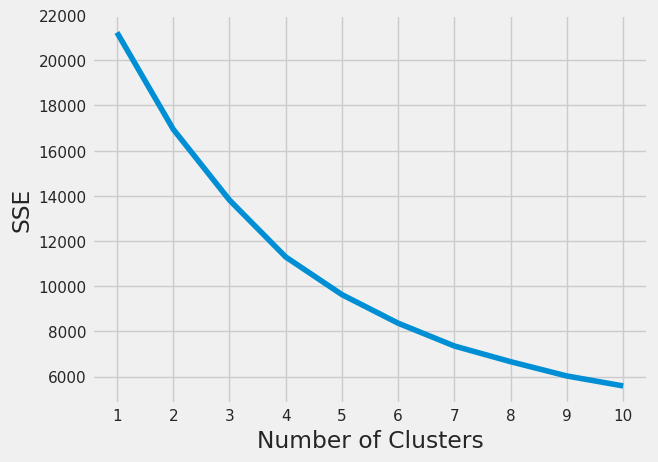

In [26]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [27]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

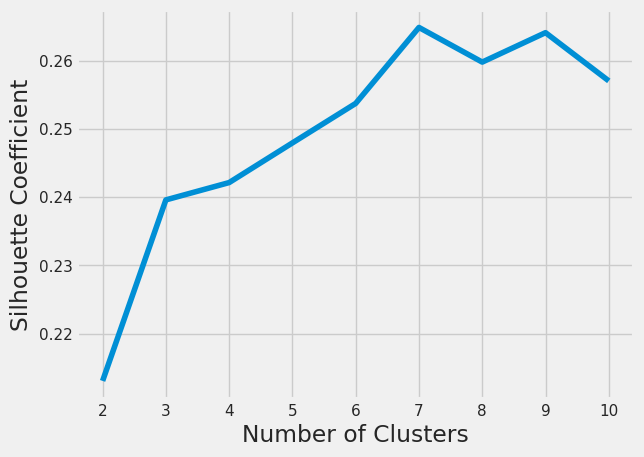

In [29]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [56]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
df_E_M['label'] = kmeans.labels_
#labels = kmeans.labels_

In [31]:
df_E_M

,AÑO,EDO,ESCOLARIDAD,MUJERES,label
8,2000,1,1,1.0,3
9,2000,1,2,2.0,3
10,2000,1,3,0.0,3
11,2000,1,5,1.0,3
12,2000,1,7,0.0,3
...,...,...,...,...,...
6199,2021,32,3,51.0,1
6200,2021,32,6,12.0,2
6201,2021,32,5,14.0,0
6202,2021,32,7,9.0,2


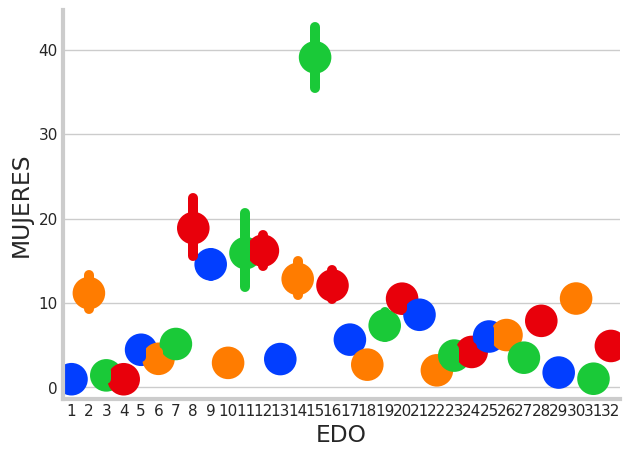

In [68]:
import seaborn as sns
import pandas as pd
import numpy as np

# Creamos el "point plot"
sns.set_style("whitegrid")
sns.pointplot(x="EDO", y="MUJERES", data=df_E_M, palette=sns.color_palette("bright", len(df_E_M["label"].unique())))

# Mostramos la visualización
sns.despine()

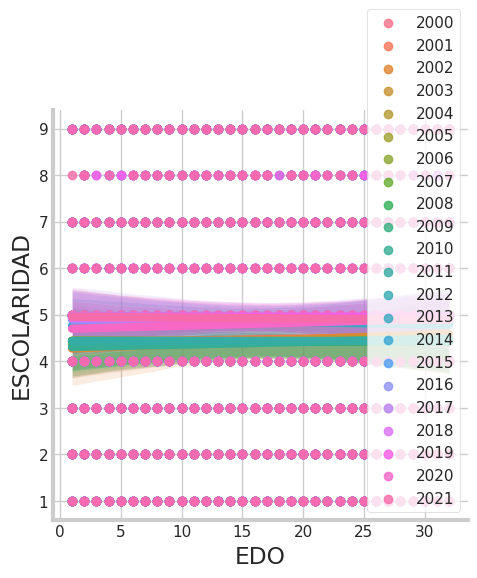

In [70]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="EDO", y="ESCOLARIDAD", data=df_E_M, fit_reg=True, hue='AÑO', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

La gráfica está representando la relación entre las variables "EDO" (estado) y "ESCOLARIDAD" para el conjunto de datos df_E_M. Cada punto en la gráfica representa un valor de "EDO" y "ESCOLARIDAD" para un año en particular. El argumento hue se utiliza para representar la variable "AÑO" con diferentes colores.

Al utilizar el argumento fit_reg=False, estamos deshabilitando la línea de regresión en la gráfica. En general, la gráfica muestra que hay una gran variabilidad en los datos y que no hay una clara tendencia en la relación entre las variables "EDO" y "ESCOLARIDAD" a lo largo del tiempo. Además, la gráfica nos permite identificar los años en los que se observan los valores más altos y más bajos de "ESCOLARIDAD" para cada estado, según el color de los puntos en la gráfica.

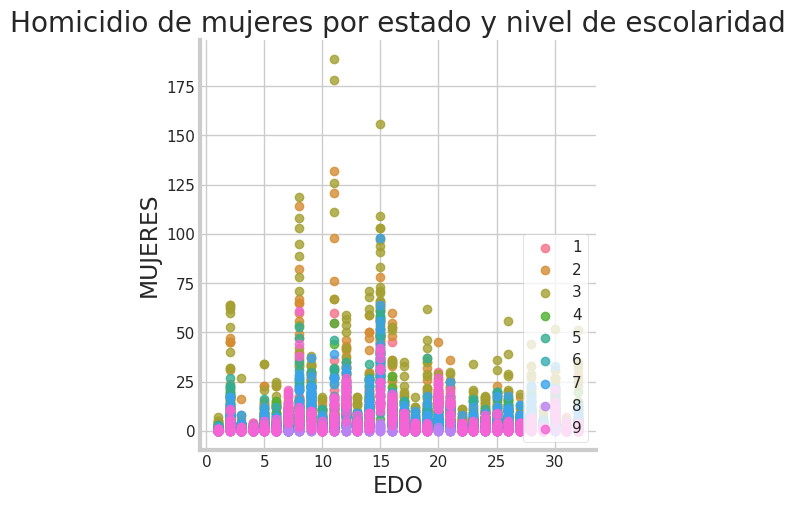

In [75]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="EDO", y="MUJERES", data=df_E_M, fit_reg=False, hue='ESCOLARIDAD', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('Homicidio de mujeres por estado y nivel de escolaridad')

plt.show()

Al observar la gráfica, se puede ver que hay diferencias notables en el número de mujeres en cada estado de México y en cada nivel de escolaridad. Por ejemplo, podemos ver que el número de mujeres con educación profesional y posgrado es generalmente bajo en comparación con los niveles de educación más bajos, como la primaria incompleta o completa. También podemos ver que en algunos estados, como Ciudad de México, hay una gran cantidad de mujeres con educación de nivel profesional y posgrado, mientras que en otros estados hay muy pocas mujeres con ese nivel de educación.


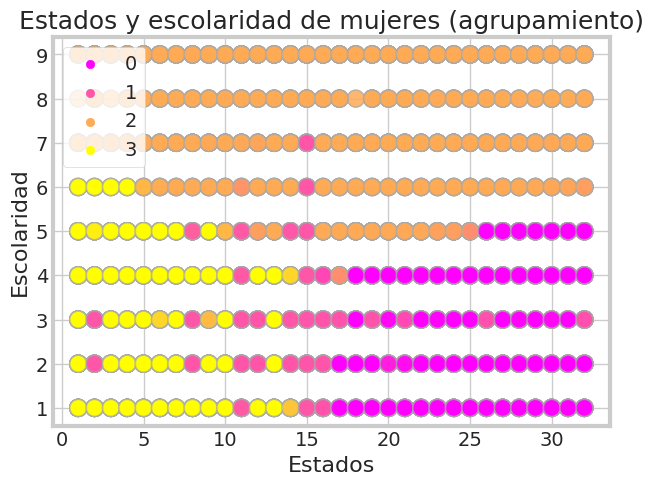

In [33]:
sns.scatterplot(x='EDO', y='ESCOLARIDAD', 
               data = df_E_M, 
               s = 150, 
               hue = 'label', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('Estados y escolaridad de mujeres (agrupamiento)', 
          fontsize = 18)
plt.xlabel('Estados', 
           fontsize = 16)
plt.ylabel('Escolaridad', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

Este gráfico muestra la relación entre el estado y la escolaridad de las mujeres en México. 
Cada punto en el gráfico representa un estado en el eje x y una clasificación de escolaridad en el eje y. Los puntos se han agrupado según alguna categoría (indicada por el parámetro "label" y la leyenda) y se han coloreado para diferenciar los grupos. 

El gráfico puede ayudar a identificar patrones en la relación entre los estados y la escolaridad de las mujeres en México.

##EMPEZAR EL AGRUPAMIENTO PARA EL DF GEN HOMBRES

In [36]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_E_H)

In [46]:
kmeans = KMeans(
    init="random",
    n_clusters=7,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [47]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=7, n_init=10, random_state=42)

In [48]:
kmeans.inertia_

7146.153990643075

In [40]:
kmeans.cluster_centers_

array([[-0.21147122,  0.87829819, -0.64901238, -0.14845645],
       [ 0.61239799, -0.26481982, -0.6562577 ,  2.86701969],
       [ 0.25517679,  0.10683313,  1.13544666, -0.30454789],
       [-0.22440022, -1.03580666, -0.47912546, -0.18488179]])

In [41]:
kmeans.n_iter_

27

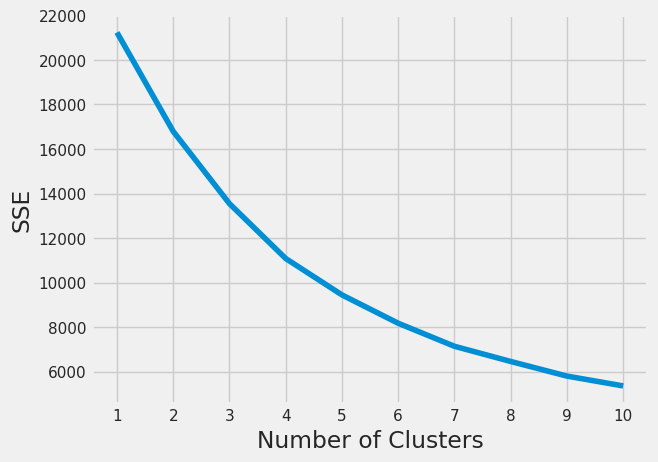

In [42]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [43]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

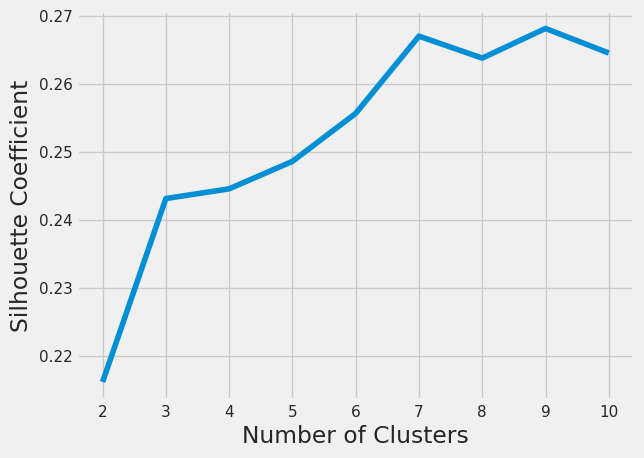

In [44]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [49]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=7,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
df_E_H['label'] = kmeans.labels_

In [50]:
df_E_H

,AÑO,EDO,ESCOLARIDAD,HOMBRES,label
8,2000,1,1,3.0,4
9,2000,1,2,3.0,4
10,2000,1,3,3.0,4
11,2000,1,5,0.0,4
12,2000,1,7,2.0,2
...,...,...,...,...,...
6199,2021,32,3,536.0,5
6200,2021,32,6,120.0,1
6201,2021,32,5,129.0,3
6202,2021,32,7,80.0,1


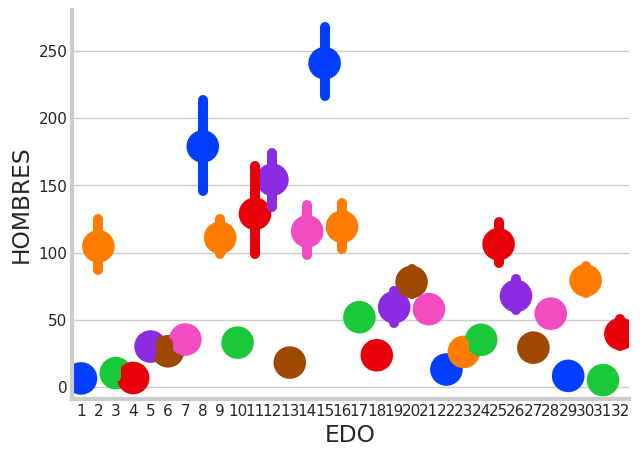

In [52]:
# Creamos el "point plot"
sns.set_style("whitegrid")
sns.pointplot(x="EDO", y="HOMBRES", data=df_E_H, palette=sns.color_palette("bright", len(df_E_H["label"].unique())))

# Mostramos la visualización
sns.despine()

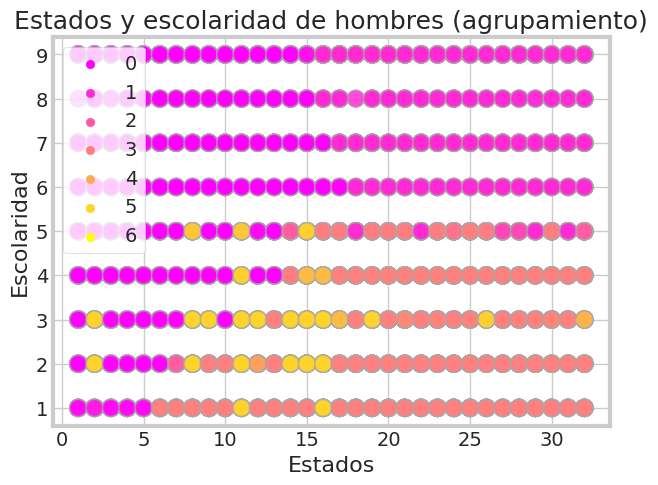

In [53]:
#area = np.pi * (df_G_H) ** 4

sns.scatterplot(x='EDO', y='ESCOLARIDAD', 
               data = df_E_H, 
               s = 150, 
               hue = 'label', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('Estados y escolaridad de hombres (agrupamiento)', 
          fontsize = 18)
plt.xlabel('Estados', 
           fontsize = 16)
plt.ylabel('Escolaridad', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)


plt.show()

En esta gráfica se puede observar la relación entre el número de homicidios de hombres y mujeres por estado, y cómo estos estados están agrupados por el algoritmo de K-means en diferentes colores. 

Los puntos representan cada estado y su posición en el eje y corresponde al número de homicidios de hombres y en el eje x al número de homicidios de mujeres. Los colores representan el grupo al que pertenece cada estado según el algoritmo de K-means.

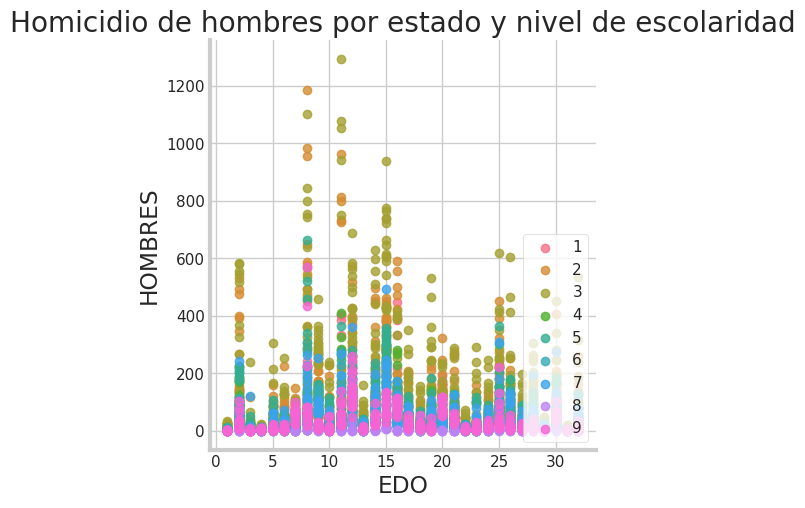

In [81]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="EDO", y="HOMBRES", data=df_E_H, fit_reg=False, hue='ESCOLARIDAD', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('Homicidio de hombres por estado y nivel de escolaridad')

plt.show()